In [3]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import apebench

/home/koehler/miniconda3/envs/mkdocs/lib/python3.12/site-packages/trainax/_general_trainer.py:7: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [5]:
advection_1d_scenario = apebench.scenarios.difficulty.Advection()

In [6]:
advection_1d_scenario

Advection(
  num_spatial_dims=1,
  num_points=160,
  num_channels=1,
  ic_config='fourier;5;true;true',
  num_warmup_steps=0,
  num_train_samples=50,
  train_temporal_horizon=50,
  train_seed=0,
  num_test_samples=30,
  test_temporal_horizon=200,
  test_seed=773,
  optim_config='adam;10_000;warmup_cosine;0.0;1e-3;2_000',
  batch_size=20,
  num_trjs_returned=1,
  record_loss_every=100,
  vlim=(-1.0, 1.0),
  report_metrics='mean_nRMSE',
  callbacks='',
  gammas=(0.0, -4.0, 0.0, 0.0, 0.0),
  coarse_proportion=0.5,
  advection_gamma=-4.0
)

In [8]:
ref_trjs = advection_1d_scenario.get_ref_sample_data()
ref_trjs.shape

(1, 201, 1, 160)

Text(0, 0.5, 'Space')

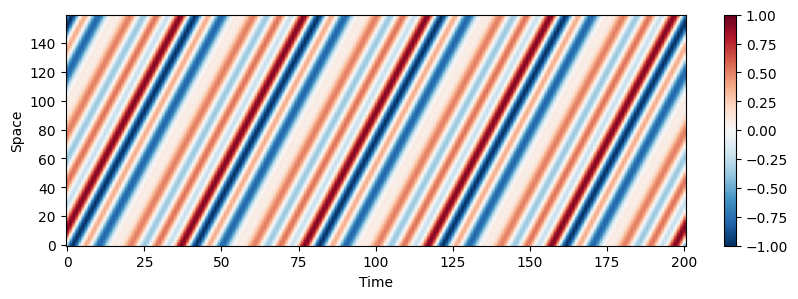

In [9]:
plt.figure(figsize=(10, 3))
plt.imshow(
    ref_trjs[0, :, 0, :].T,
    vmin=-1,
    vmax=1,
    cmap="RdBu_r",
    aspect="auto",
    origin="lower",
)
plt.colorbar()
plt.xlabel("Time")
plt.ylabel("Space")

In [10]:
data, trained_model = advection_1d_scenario(
    task_config="predict",
    network_config="Conv;34;10;relu",
    start_seed=0,
    num_seeds=10,
)

E: 00000, B: 00000:   0%|          | 0/10000 [00:00<?, ?it/s]2024-06-26 10:51:32.855969: W external/xla/xla/tsl/framework/bfc_allocator.cc:291] Allocator (GPU_0_bfc) ran out of memory trying to allocate 5.38GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-06-26 10:51:32.901414: W external/xla/xla/tsl/framework/bfc_allocator.cc:291] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.77GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
E: 00079, B: 00124: 100%|██████████| 10000/10000 [01:18<00:00, 126.72it/s]


In [11]:
data

,scenario,task,train,net,seed,scenario_kwargs,mean_nRMSE_0001,mean_nRMSE_0002,mean_nRMSE_0003,mean_nRMSE_0004,...,aux_009991,aux_009992,aux_009993,aux_009994,aux_009995,aux_009996,aux_009997,aux_009998,aux_009999,sample_rollout_000
0,1d_diff_adv,predict,one,Conv;34;10;relu,0,{},0.002518,0.004779,0.007016,0.009224,...,{},{},{},{},{},{},{},{},{},"[[[-0.4419727623462677, -0.2898244559764862, -..."
1,1d_diff_adv,predict,one,Conv;34;10;relu,1,{},0.002102,0.003939,0.005753,0.007544,...,{},{},{},{},{},{},{},{},{},"[[[-0.4419727623462677, -0.2898244559764862, -..."
2,1d_diff_adv,predict,one,Conv;34;10;relu,2,{},0.003444,0.006540,0.009621,0.012683,...,{},{},{},{},{},{},{},{},{},"[[[-0.4419727623462677, -0.2898244559764862, -..."
3,1d_diff_adv,predict,one,Conv;34;10;relu,3,{},0.002408,0.004597,0.006771,0.008931,...,{},{},{},{},{},{},{},{},{},"[[[-0.4419727623462677, -0.2898244559764862, -..."
4,1d_diff_adv,predict,one,Conv;34;10;relu,4,{},0.002656,0.005074,0.007482,0.009876,...,{},{},{},{},{},{},{},{},{},"[[[-0.4419727623462677, -0.2898244559764862, -..."
5,1d_diff_adv,predict,one,Conv;34;10;relu,5,{},0.002781,0.005398,0.008000,0.010581,...,{},{},{},{},{},{},{},{},{},"[[[-0.4419727623462677, -0.2898244559764862, -..."
6,1d_diff_adv,predict,one,Conv;34;10;relu,6,{},0.002296,0.004277,0.006240,0.008180,...,{},{},{},{},{},{},{},{},{},"[[[-0.4419727623462677, -0.2898244559764862, -..."
7,1d_diff_adv,predict,one,Conv;34;10;relu,7,{},0.002537,0.004749,0.006947,0.009129,...,{},{},{},{},{},{},{},{},{},"[[[-0.4419727623462677, -0.2898244559764862, -..."
8,1d_diff_adv,predict,one,Conv;34;10;relu,8,{},0.002928,0.005597,0.008247,0.010875,...,{},{},{},{},{},{},{},{},{},"[[[-0.4419727623462677, -0.2898244559764862, -..."
9,1d_diff_adv,predict,one,Conv;34;10;relu,9,{},0.003284,0.006308,0.009310,0.012290,...,{},{},{},{},{},{},{},{},{},"[[[-0.4419727623462677, -0.2898244559764862, -..."


In [12]:
trained_model

ConvNet(
  layers=(
    PhysicsConv(
      num_spatial_dims=1,
      weight=f32[10,34,1,3],
      bias=f32[10,34,1],
      in_channels=1,
      out_channels=34,
      kernel_size=(3,),
      stride=(1,),
      padding=((1, 1),),
      padding_mode='circular',
      dilation=(1,),
      groups=1,
      use_bias=True,
      boundary_mode='periodic'
    ),
    PhysicsConv(
      num_spatial_dims=1,
      weight=f32[10,34,34,3],
      bias=f32[10,34,1],
      in_channels=34,
      out_channels=34,
      kernel_size=(3,),
      stride=(1,),
      padding=((1, 1),),
      padding_mode='circular',
      dilation=(1,),
      groups=1,
      use_bias=True,
      boundary_mode='periodic'
    ),
    PhysicsConv(
      num_spatial_dims=1,
      weight=f32[10,34,34,3],
      bias=f32[10,34,1],
      in_channels=34,
      out_channels=34,
      kernel_size=(3,),
      stride=(1,),
      padding=((1, 1),),
      padding_mode='circular',
      dilation=(1,),
      groups=1,
      use_bias=True,
      

In [14]:
loss_data = apebench.melt_loss(data)

In [15]:
loss_data

,seed,scenario,task,net,train,scenario_kwargs,update_step,train_loss
0,0,1d_diff_adv,predict,Conv;34;10;relu,one,{},0,0.236119
1,0,1d_diff_adv,predict,Conv;34;10;relu,one,{},100,0.226269
2,0,1d_diff_adv,predict,Conv;34;10;relu,one,{},200,0.121180
3,0,1d_diff_adv,predict,Conv;34;10;relu,one,{},300,0.000178
4,0,1d_diff_adv,predict,Conv;34;10;relu,one,{},400,0.000046
...,...,...,...,...,...,...,...,...
995,9,1d_diff_adv,predict,Conv;34;10;relu,one,{},9500,0.000002
996,9,1d_diff_adv,predict,Conv;34;10;relu,one,{},9600,0.000002
997,9,1d_diff_adv,predict,Conv;34;10;relu,one,{},9700,0.000002
998,9,1d_diff_adv,predict,Conv;34;10;relu,one,{},9800,0.000002


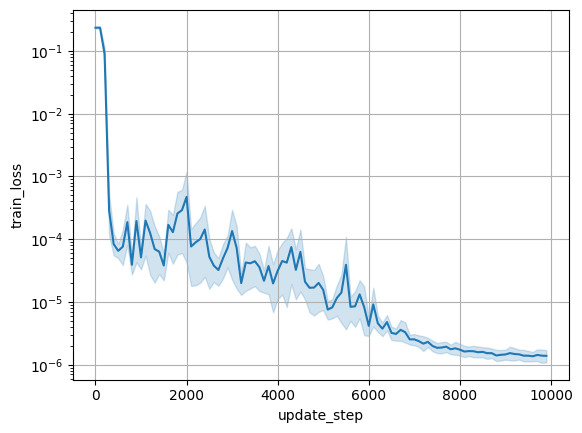

In [17]:
sns.lineplot(data=loss_data, x="update_step", y="train_loss")
plt.yscale("log")
plt.grid()

In [18]:
metric_data = apebench.melt_metrics(data)

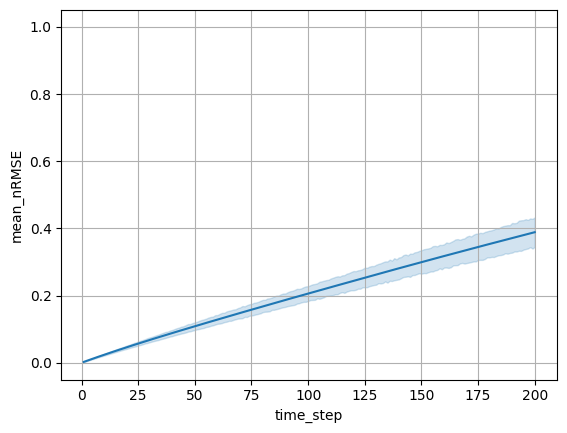

In [19]:
sns.lineplot(data=metric_data, x="time_step", y="mean_nRMSE")
plt.ylim(-0.05, 1.05)
plt.grid()

In [20]:
sample_rollout_data = apebench.melt_sample_rollouts(data)

In [21]:
sample_rollout_data

,seed,scenario,task,net,train,scenario_kwargs,sample_index,sample_rollout
0,0,1d_diff_adv,predict,Conv;34;10;relu,one,{},0,"[[[-0.4419727623462677, -0.2898244559764862, -..."
1,1,1d_diff_adv,predict,Conv;34;10;relu,one,{},0,"[[[-0.4419727623462677, -0.2898244559764862, -..."
2,2,1d_diff_adv,predict,Conv;34;10;relu,one,{},0,"[[[-0.4419727623462677, -0.2898244559764862, -..."
3,3,1d_diff_adv,predict,Conv;34;10;relu,one,{},0,"[[[-0.4419727623462677, -0.2898244559764862, -..."
4,4,1d_diff_adv,predict,Conv;34;10;relu,one,{},0,"[[[-0.4419727623462677, -0.2898244559764862, -..."
5,5,1d_diff_adv,predict,Conv;34;10;relu,one,{},0,"[[[-0.4419727623462677, -0.2898244559764862, -..."
6,6,1d_diff_adv,predict,Conv;34;10;relu,one,{},0,"[[[-0.4419727623462677, -0.2898244559764862, -..."
7,7,1d_diff_adv,predict,Conv;34;10;relu,one,{},0,"[[[-0.4419727623462677, -0.2898244559764862, -..."
8,8,1d_diff_adv,predict,Conv;34;10;relu,one,{},0,"[[[-0.4419727623462677, -0.2898244559764862, -..."
9,9,1d_diff_adv,predict,Conv;34;10;relu,one,{},0,"[[[-0.4419727623462677, -0.2898244559764862, -..."


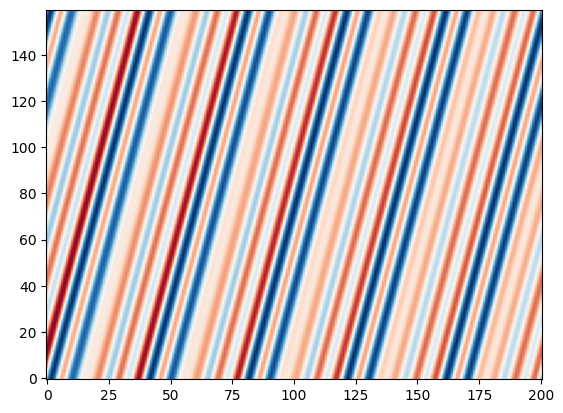

In [23]:
import numpy as np

plt.imshow(
    np.array(sample_rollout_data["sample_rollout"][0])[:, 0, :].T,
    vmin=-1,
    vmax=1,
    cmap="RdBu_r",
    aspect="auto",
    origin="lower",
)

### Running a study of experiments

Comparing the performance of a Conv Net and a FNO

In [26]:
CONFIGS = [
    {
        "scenario": "norm_adv",
        "task": "predict",
        "net": net,
        "train": "one",
        "start_seed": 0,
        "num_seeds": 10,
    }
    for net in ["Conv;26;10;relu", "FNO;12;8;4;gelu"]
]

In [27]:
(
    df_metric,
    df_loss,
    df_sample_rollout,
    network_list,
) = apebench.run_study_convenience(
    CONFIGS,
    do_loss=True,
)

Considering
norm_adv__predict__Conv;26;10;relu__one__0-9


E: 00000, B: 00000:   0%|          | 0/10000 [00:00<?, ?it/s]2024-06-26 11:02:09.047590: W external/xla/xla/tsl/framework/bfc_allocator.cc:291] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.11GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-06-26 11:02:09.091743: W external/xla/xla/tsl/framework/bfc_allocator.cc:291] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.14GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
E: 00079, B: 00124: 100%|██████████| 10000/10000 [01:15<00:00, 132.29it/s]


Finished training!

Considering
norm_adv__predict__FNO;12;8;4;gelu__one__0-9


E: 00079, B: 00124: 100%|██████████| 10000/10000 [01:09<00:00, 143.33it/s]


Finished training!



Melt and Concat loss: 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]


In [28]:
df_loss

,seed,scenario,task,net,train,scenario_kwargs,update_step,train_loss
0,0,1d_norm_adv,predict,Conv;26;10;relu,one,{},0,2.405525e-01
1,0,1d_norm_adv,predict,Conv;26;10;relu,one,{},100,2.281046e-01
2,0,1d_norm_adv,predict,Conv;26;10;relu,one,{},200,1.904149e-01
3,0,1d_norm_adv,predict,Conv;26;10;relu,one,{},300,2.793611e-04
4,0,1d_norm_adv,predict,Conv;26;10;relu,one,{},400,4.339279e-05
...,...,...,...,...,...,...,...,...
1995,9,1d_norm_adv,predict,FNO;12;8;4;gelu,one,{},9500,6.197333e-07
1996,9,1d_norm_adv,predict,FNO;12;8;4;gelu,one,{},9600,7.953730e-07
1997,9,1d_norm_adv,predict,FNO;12;8;4;gelu,one,{},9700,6.953396e-07
1998,9,1d_norm_adv,predict,FNO;12;8;4;gelu,one,{},9800,6.860286e-07


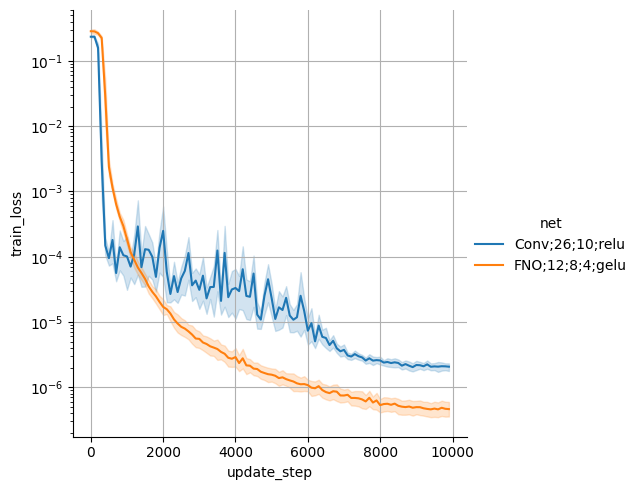

In [30]:
facet = sns.relplot(
    data=df_loss,
    x="update_step",
    y="train_loss",
    hue="net",
    kind="line",
)
facet.set(yscale="log")
plt.grid()

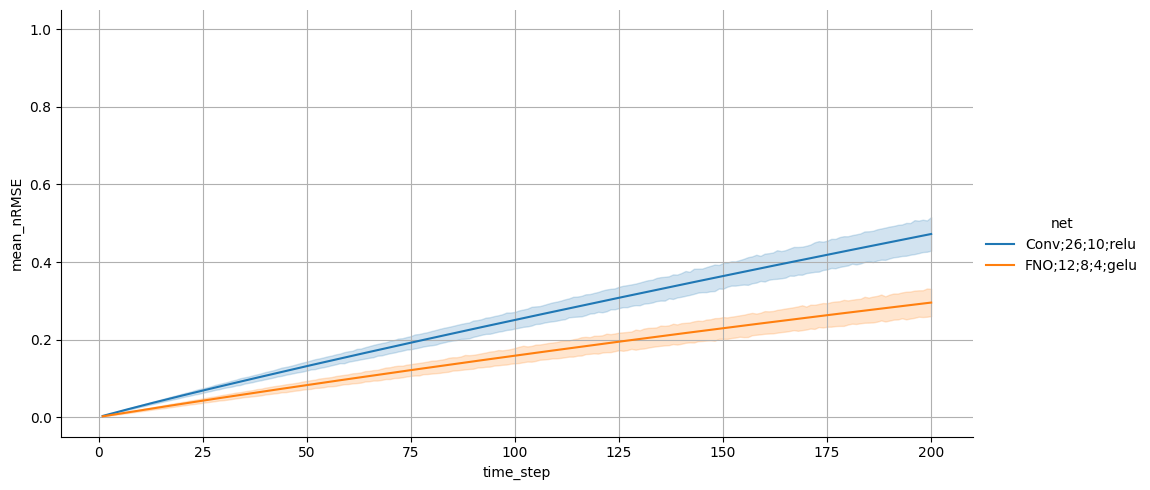

In [31]:
facet = sns.relplot(
    data=df_metric,
    x="time_step",
    y="mean_nRMSE",
    hue="net",
    kind="line",
    aspect=2,
    facet_kws=dict(ylim=(-0.05, 1.05)),
)
plt.grid()